In [3]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
#특허 데이터 불러오기
df=pd.read_excel('특허_명사_수정.xlsx',index_col=0)
df

,출원번호,출원일자,발명의 명칭,출원인,요약,year,nouns
0,10-2015-0062820,2015.05.05,압력가압수단에 의해 원터치 방식으로 망체를 창틀프레임에 고정시키는 방법 및 이를 이...,주식회사 에스지텍(대전광역시 중구...),본 발명은 압력가압수단에 의해 편리하게 망체가 결합되는 방범창 및 이를 이용한 망체...,2015,"['압력', '가압', '수단', '편리', '망체', '결합', '방범', '창'..."
1,10-2015-0045530,2015.03.31,터널 화재진압용 차폐장치(ENCLOSURE APPARATUS FOR FIRE SUP...,창전이앤시 주식회사(경기도 용인시 수지구...),"본 발명은, 터널의 환기작동을 행할 수 있어 터널의 유지관리를 효과적으로 행할 수 ...",2015,"['터널', '환기', '작동', '터널', '유지', '관리', '효과', '화재..."
2,10-2015-0003420,2015.01.09,사다리형 부재 용접장치(Apparatus for Welding Ladder type...,(주)마스타에프에이(광주광역시 광산구...),"본 발명은 사다리형 부재 용접장치에 관한 것이다. 이를 위해, 본 발명은 장축부재와...",2015,"['사다리', '용접', '장치', '장축', '단축', '사다리', '형태', '..."
3,10-2014-7020640,2013.01.29,이동가능한 재배치층을 이용하여 재배치된 웨이퍼의 제조방법(METHOD FOR MAK...,"엘3해리스 테크놀러지스, 인크.(미합중국 플로리다 ***** 멜보른 웨스트 나사 블...",본 발명은 복수의 전자 디바이스를 갖는 웨이퍼를 제공하는 단계를 포함하는 재배치된 ...,2015,"['전자', '디바이스', '웨이퍼', '배치', '전자', '디바이스', '제조'..."
4,10-2014-0180930,2014.12.16,도로 절단장치(Pavement cutting apparatus),주식회사 한라기계상사(경기도 광주시...),"본 발명은 도로 절단장치에 관한 것으로, 특히 도로의 절단시 발생하는 분진의 비산을...",2015,"['도로', '절단', '장치', '도로', '절단', '분진', '산', '방지'..."
...,...,...,...,...,...,...,...
886173,10-2020-7021005,2018.02.13,성형면 패스너 및 성형면 패스너의 제조 방법(MOLDED HOOK-AND-LOOP ...,와이케이케이 가부시끼가이샤(일본 도꾜도 지요다꾸 간다 이즈미쪼 *반지),"본 발명의 성형면 패스너는, 기부(11, 81)와, 기부(11, 81)의 상면에 길...",2022,"['성형', '면', '패스', '기부', '기부', '상면', '길', '방향',..."
886174,10-2021-0174947,2021.12.08,방수 투습 기능성 앞치마(MOISTURE-PERMEABLE MOISTURE-PROO...,이성근(경기도 포천시...),"본 발명은 방수 투습 기능성 앞치마에 관한 것으로, 보다 상세하게는 상부 방향으로 ...",2022,"['방수', '투습', '기능', '앞치마', '상부', '방향', '형성', '목..."
886175,10-2020-7019455,2018.12.12,핸들 어셈블리 및 이를 포함하는 스테이플러(HANDLE ASSEMBLY AND ST...,"터치스톤 인터내셔널 메디컬 사이언스 씨오., 엘티디.(중국 지앙수 ****** 쑤저...",본 발명은 핸들 어셈블리 및 이를 포함하는 스테이플러를 제공한다. 상기 핸들 어셈블...,2022,"['핸들', '어셈블리', '스테이플러', '핸들', '어셈블리', '핸들', '핸..."
886176,10-2021-0167127,2021.11.29,자동 채수기(Automatic water sampler),이정원(경상남도 통영시...)|허세민(경상남도 김해시...)|윤준호(경상남도 창원시...,"본 발명은 자동 채수기에 관한 것으로, 내부에 유체를 저장하는 유체 저장부가 형성되...",2022,"['자동', '채수기', '내부', '유체', '저장', '유체', '장부', '형..."


## 기술 통계량

In [8]:
#연도별 특허 수
df['year'].value_counts(sort=False)

2015     66647
2016     79088
2017     94982
2018    102851
2019    121522
2020    137737
2021    148352
2022    134999
Name: year, dtype: int64

In [4]:
#연도별 특허 수 통계량
df['year'].value_counts().describe()

count         8.000000
mean     110772.250000
std       29531.666963
min       66647.000000
25%       91008.500000
50%      112186.500000
75%      135683.500000
max      148352.000000
Name: year, dtype: float64

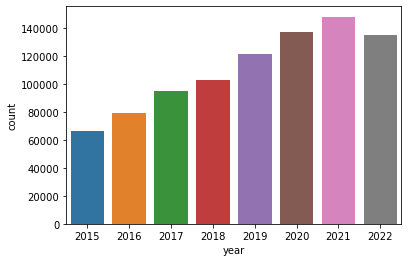

In [5]:
#연도별 특허 수 그래프
sns.countplot(data=df,x='year')
plt.show()

In [6]:
#특허 별 명사 수 통계량
df['nouns'].str.len().describe()

count    886178.000000
mean        390.365915
std         227.892627
min           4.000000
25%         246.000000
50%         350.000000
75%         482.000000
max       10846.000000
Name: nouns, dtype: float64

<AxesSubplot:>

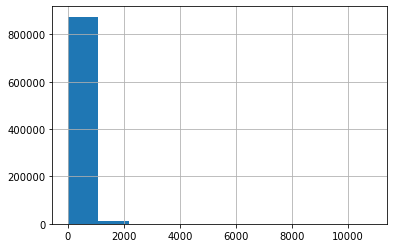

In [7]:
#특허 별 명사 수 분포
df['nouns'].str.len().hist()

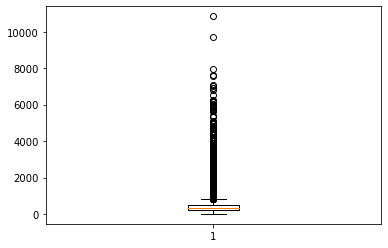

In [8]:
#특허 별 명사 수 boxplot
plt.boxplot(df['nouns'].str.len())
plt.show()

## 키워드 추출 - 통합문서

### 단어 빈도수 기준

In [11]:
vectorizer = CountVectorizer(
                            min_df=1500, # 최소 1500개 이상의 특허에 등장해야 함
                             ngram_range=(1,2) # ngram 1=단어 하나씩 묶음(unigram), 2=단어 2개를 한 묶음으로 취급(bigram)
                             ) #모델 파라미터 설정

tf_vector = vectorizer.fit_transform(df['nouns'].astype(str)) # 특허 별 명사 단어 학습 및 document-term matrix 반환

In [12]:
tf_scores = tf_vector.toarray().sum(axis=0) #단어 별 빈도수 총합 계산
tf_idx = np.argsort(-tf_scores)  #배열 내림차 순 정렬 후 인덱스 반환
tf_scores = tf_scores[tf_idx] #빈도 수 내림차 순 정렬
tf_vocab = np.array(vectorizer.get_feature_names_out())[tf_idx] #단어 빈도 수 높은 순 정렬

print(list(zip(tf_vocab, tf_scores))[:100]) #상위 100개 단어 및 빈도수

[('장치', 684365), ('형성', 621920), ('연결', 368360), ('정보', 355343), ('제어', 328834), ('결합', 290697), ('방향', 289409), ('위치', 274377), ('제조', 271286), ('시스템', 253868), ('데이터', 253654), ('신호', 251877), ('내부', 241163), ('공급', 230173), ('고정', 221440), ('회전', 221215), ('배치', 211497), ('이동', 189970), ('상부', 184913), ('영역', 183392), ('사용자', 181143), ('기판', 177459), ('지지', 174472), ('프레임', 173679), ('모듈', 168958), ('전극', 156725), ('하부', 150526), ('공간', 150141), ('유닛', 149156), ('수신', 145130), ('방지', 141539), ('본체', 140368), ('저장', 138620), ('측정', 132745), ('센서', 131930), ('표시', 131386), ('영상', 131338), ('구동', 130188), ('효과', 129572), ('출력', 128283), ('입력', 126462), ('차량', 125989), ('가스', 125394), ('외부', 123479), ('삽입', 115271), ('표면', 114932), ('공기', 114034), ('수단', 108609), ('전기', 106970), ('조절', 104779), ('통신', 102522), ('전송', 101322), ('향상', 99045), ('감지', 98969), ('측면', 97918), ('수용', 97535), ('결정', 97067), ('대응', 97002), ('배출', 96615), ('분리', 95725), ('검출', 95192), ('금속', 94390), ('온도', 92226)

In [13]:
len(list(zip(tf_vocab, tf_scores)))

3164

### TF-IDF 기준

In [14]:
tfidf_vectorizer = TfidfVectorizer(
                             min_df=1500, # 최소 1500개 이상의 특허에 등장해야 함
                             ngram_range=(1,2)  # ngram 1=단어 하나씩 묶음(unigram), 2=단어 2개를 한 묶음으로 취급(bigram)
                             )
tfidf_vector = tfidf_vectorizer.fit_transform(df['nouns'].astype(str)) # 특허 별 명사 단어 학습 및 document-term matrix 반환

In [15]:
tfidf_scores = tfidf_vector.toarray().sum(axis=0) #단어 별 TF-IDF 총합 계산
tfidf_idx = np.argsort(-tfidf_scores)  #배열 내림차 순 정렬 후 인덱스 반환
tfidf_scores = tfidf_scores[tfidf_idx] #TF-IDF 내림차 순 정렬
tfidf_vocab = np.array(tfidf_vectorizer.get_feature_names_out())[tfidf_idx] #단어 TF-IDF 높은 순 정렬

print(list(zip(tfidf_vocab, tfidf_scores))[:100])  #상위 100개 단어 및 TF-IDF 

[('장치', 21519.74734641423), ('형성', 21161.561510039013), ('제조', 16128.36754097075), ('정보', 14802.210663639076), ('연결', 14068.33448263356), ('제어', 13367.226110384003), ('결합', 13007.802871626864), ('방향', 12247.047899146051), ('데이터', 11975.962525991075), ('신호', 11841.510879866839), ('위치', 11373.771751473523), ('시스템', 11193.667273975247), ('기판', 10786.188355120708), ('회전', 10781.962042394305), ('내부', 10549.392309890263), ('고정', 10217.769992836165), ('배치', 10058.901445080679), ('공급', 10043.057355915173), ('전극', 9941.779335794326), ('영역', 9867.79557509933), ('프레임', 9614.813559972346), ('사용자', 9327.073196428239), ('지지', 9183.290658256883), ('이동', 8949.454983103542), ('모듈', 8814.661153625366), ('상부', 8521.257943891173), ('본체', 8507.939283624632), ('유닛', 8421.892429355767), ('공간', 7773.038435867623), ('표시', 7696.9519350179335), ('방지', 7586.245280275855), ('영상', 7577.065302647822), ('효과', 7504.298473804215), ('차량', 7493.777411025346), ('측정', 7420.373216441585), ('표면', 7321.553640201472), ('가스', 7

In [16]:
len(list(zip(tfidf_vocab, tfidf_scores)))

3164

In [17]:
#단어 빈도 수 기준, TF-IDF 기준 데이터 저장
tf_tfidf_vocab = pd.DataFrame(list(zip(tf_vocab, tf_scores,tfidf_vocab,tfidf_scores)))
tf_tfidf_vocab

,0,1,2,3
0,장치,684365,장치,21519.747346
1,형성,621920,형성,21161.561510
2,연결,368360,제조,16128.367541
3,정보,355343,정보,14802.210664
4,제어,328834,연결,14068.334483
...,...,...,...,...
3159,장치 제시,1597,유입 입구,171.052202
3160,효과 기대,1592,제어 컨트롤러,169.266754
3161,효과 제거,1575,하부 하부,168.504765
3162,안정 확보,1570,고정 하부,162.976435


In [18]:
# 엑셀 파일로 저장
tf_tfidf_vocab.to_excel('단어_수정.xlsx',header=['COUNT_단어','COUNT','TF-IDF_단어','TF-IDF'],index=None)

## 키워드 추출 - 연도별 문서

In [10]:
#연도별 상위 키워드 추출
def extract_keywords_by_year(vectorizer,year,topn):
    vector = vectorizer.fit_transform(df[df['year']==year]['nouns'].astype(str))
    scores = vector.toarray().sum(axis=0)
    idx = np.argsort(-scores)
    scores = scores[idx]
    vocab = np.array(vectorizer.get_feature_names_out())[idx]
    
    return list(zip(vocab, scores))[:topn]

In [12]:
#COUNT VECTORIZER 파라미터 설정
vectorizer_year = CountVectorizer(
                             min_df=150, # 최소 150개 이상의 특허에 등장해야 함
                             ngram_range=(1,2)  # ngram 1=단어 하나씩 묶음(unigram), 2=단어 2개를 한 묶음으로 취급(bigram)
                             )

In [44]:
#TF-IDF VECTORIZER 파라미터 설정
tfidf_vectorizer_year = TfidfVectorizer(
                             min_df=150, # 최소 150개 이상의 특허에 등장해야 함
                             ngram_range=(1,2)  # ngram 1=단어 하나씩 묶음(unigram), 2=단어 2개를 한 묶음으로 취급(bigram)
                             )

### 키워드 추출

In [29]:
# 2020년 빈도 수 기준 상위 20개 단어
pd.DataFrame(extract_keywords_by_year(vectorizer_year,2020,20),columns=['word','count'])

,word,count
0,장치,105549
1,형성,95912
2,연결,56505
3,정보,55841
4,제어,49924
5,방향,45858
6,결합,45165
7,위치,42858
8,제조,39858
9,데이터,39756


In [30]:
# 2020년 TF-IDF 기준 상위 20개 단어
pd.DataFrame(extract_keywords_by_year(tfidf_vectorizer_year,2020,20),columns=['word','tf-idf'])

,word,tf-idf
0,장치,3139.668391
1,형성,3081.873735
2,제조,2257.754481
3,정보,2160.786412
4,연결,2048.281286
5,제어,1931.798541
6,결합,1901.133161
7,방향,1822.592081
8,데이터,1783.792774
9,신호,1764.722897


In [31]:
#연도별 빈도 수 기준 상위 40개 단어
count_keywords_annually = pd.DataFrame()
for year in range(2015,2023):
    result = pd.DataFrame(extract_keywords_by_year(vectorizer_year,year,40))[0]
    count_keywords_annually[year] = result

In [32]:
# 단어 - 빈도수 연도 테이블 (2015~2022)
count_keywords_annually

,2015,2016,2017,2018,2019,2020,2021,2022
0,장치,장치,장치,형성,장치,장치,장치,장치
1,형성,형성,형성,장치,형성,형성,형성,형성
2,연결,연결,연결,연결,연결,연결,정보,정보
3,제어,제어,제어,제어,정보,정보,연결,연결
4,결합,정보,정보,정보,제어,제어,제어,제어
5,정보,결합,결합,결합,방향,방향,데이터,데이터
6,제조,제조,제조,방향,결합,결합,방향,방향
7,방향,방향,방향,제조,제조,위치,위치,시스템
8,위치,위치,위치,위치,위치,제조,결합,위치
9,신호,신호,신호,내부,신호,데이터,시스템,배치


In [33]:
#연도별 TF-IDF 기준 상위 40개 단어
tfidf_keywords_annually = pd.DataFrame()
for year in range(2015,2023):
    result = pd.DataFrame(extract_keywords_by_year(tfidf_vectorizer_year,year,40))[0]
    tfidf_keywords_annually[year] = result

In [34]:
# 단어 - TF-IDF연도 테이블 (2015~2022)
tfidf_keywords_annually

,2015,2016,2017,2018,2019,2020,2021,2022
0,형성,형성,형성,형성,형성,장치,장치,장치
1,장치,장치,장치,장치,장치,형성,형성,형성
2,제조,제조,제조,제조,제조,제조,정보,정보
3,연결,연결,연결,연결,연결,정보,제조,제조
4,제어,정보,정보,정보,정보,연결,연결,연결
5,결합,제어,제어,결합,제어,제어,제어,데이터
6,정보,결합,결합,제어,결합,결합,데이터,제어
7,회전,방향,방향,방향,방향,방향,결합,방향
8,방향,신호,신호,신호,신호,데이터,방향,시스템
9,신호,회전,위치,회전,데이터,신호,신호,결합


In [111]:
keywords_column_headers = ['2015_count','2016_count','2017_count','2018_count',
                           '2019_count','2020_count','2021_count','2022_count',
                           '2015_tfidf','2016_tfidf','2017_tfidf','2018_tfidf',
                           '2019_tfidf','2020_tfidf','2021_tfidf','2022_tfidf']
                           

In [112]:
keywords_annually=pd.concat([count_keywords_annually,tfidf_keywords_annually],axis=1)
keywords_annually.columns=keywords_column_headers 
keywords_annually

,2015_count,2016_count,2017_count,2018_count,2019_count,2020_count,2021_count,2022_count,2015_tfidf,2016_tfidf,2017_tfidf,2018_tfidf,2019_tfidf,2020_tfidf,2021_tfidf,2022_tfidf
0,상기,상기,상기,상기,상기,상기,상기,상기,상기,상기,상기,상기,상기,상기,상기,상기
1,포함,포함,포함,포함,포함,포함,포함,포함,형성,포함,포함,포함,포함,포함,포함,포함
2,장치,장치,장치,형성,장치,장치,장치,장치,장치,형성,단계,형성,형성,장치,단계,단계
3,형성,형성,형성,장치,형성,형성,형성,단계,포함,장치,형성,단계,장치,단계,장치,장치
4,방법,방법,방법,방법,단계,방법,단계,형성,단계,단계,장치,장치,단계,형성,형성,형성
5,단계,단계,단계,단계,방법,단계,방법,방법,방법,방법,방법,방법,방법,방법,방법,방법
6,제공,제공,제공,제공,제공,제공,제공,제공,제조,제조,제조,제조,제조,제공,정보,정보
7,연결,연결,연결,연결,연결,연결,정보,정보,제공,제공,제공,제공,제공,제조,제공,제공
8,설치,설치,제어,제어,정보,정보,연결,연결,연결,연결,정보,연결,연결,정보,제조,제조
9,제어,제어,설치,설치,제어,제어,제어,제어,제어,정보,연결,정보,정보,연결,제어,연결


In [113]:
keywords_annually = keywords_annually.reindex(['2015_count','2015_tfidf','2016_count','2016_tfidf',
                                               '2017_count','2017_tfidf','2018_count','2018_tfidf',
                                               '2019_count','2019_tfidf','2020_count','2020_tfidf',
                                               '2021_count','2021_tfidf','2022_count','2022_tfidf'],axis=1)
keywords_annually

,2015_count,2015_tfidf,2016_count,2016_tfidf,2017_count,2017_tfidf,2018_count,2018_tfidf,2019_count,2019_tfidf,2020_count,2020_tfidf,2021_count,2021_tfidf,2022_count,2022_tfidf
0,상기,상기,상기,상기,상기,상기,상기,상기,상기,상기,상기,상기,상기,상기,상기,상기
1,포함,형성,포함,포함,포함,포함,포함,포함,포함,포함,포함,포함,포함,포함,포함,포함
2,장치,장치,장치,형성,장치,단계,형성,형성,장치,형성,장치,장치,장치,단계,장치,단계
3,형성,포함,형성,장치,형성,형성,장치,단계,형성,장치,형성,단계,형성,장치,단계,장치
4,방법,단계,방법,단계,방법,장치,방법,장치,단계,단계,방법,형성,단계,형성,형성,형성
5,단계,방법,단계,방법,단계,방법,단계,방법,방법,방법,단계,방법,방법,방법,방법,방법
6,제공,제조,제공,제조,제공,제조,제공,제조,제공,제조,제공,제공,제공,정보,제공,정보
7,연결,제공,연결,제공,연결,제공,연결,제공,연결,제공,연결,제조,정보,제공,정보,제공
8,설치,연결,설치,연결,제어,정보,제어,연결,정보,연결,정보,정보,연결,제조,연결,제조
9,제어,제어,제어,정보,설치,연결,설치,정보,제어,정보,제어,연결,제어,제어,제어,연결


In [ ]:
# 엑셀 파일로 저장
keywords_annually.to_excel('연도별키워드.xlsx')

## 2023 단어 키워드 예측(COUNT)

In [61]:
#상위 40개 단어 연도별 빈도 수 파악
cnt={}
for year in range(2015,2023):
    result = extract_keywords_by_year(vectorizer_year,year,40)
    if year==2015:
        for i in result:
            cnt[i[0]]=[i[1]]
    else:
        for i in result:
            if i[0] in cnt:
                cnt[i[0]].append(i[1])
cnt

{'장치': [55787, 63131, 72508, 76838, 94038, 105549, 112310, 104204],
 '형성': [53134, 61287, 71402, 77915, 88429, 95912, 94369, 79472],
 '연결': [29259, 34009, 39832, 44804, 51233, 56505, 57984, 54734],
 '제어': [26068, 30649, 36417, 38336, 44701, 49924, 54500, 48239],
 '결합': [24136, 27681, 33609, 35637, 40073, 45165, 45482, 38914],
 '정보': [23481, 30350, 35579, 37803, 45407, 55841, 65236, 61646],
 '제조': [22401, 26235, 33169, 34209, 37981, 39858, 42179, 35254],
 '방향': [21413, 25743, 31162, 34693, 40453, 45858, 46985, 43102],
 '위치': [20427, 25150, 29955, 32242, 37110, 42858, 45640, 40995],
 '신호': [20015, 23786, 27630, 28515, 34375, 39448, 40806, 37302],
 '내부': [20009, 23017, 26609, 28941, 33144, 37095, 37832, 34516],
 '고정': [19477, 22614, 26159, 27397, 30701, 33934, 33583, 27575],
 '회전': [19425, 21880, 24778, 27933, 31008, 34342, 32540, 29309],
 '공급': [19320, 21913, 26033, 28180, 31632, 34938, 36388, 31769],
 '시스템': [18525, 21973, 25764, 27444, 33163, 38801, 45357, 42841],
 '데이터': [17319, 20554

In [17]:
#8년치 데이터 결측 단어 제거
del_list=[]
for i in cnt:
    if len(cnt[i])<8:
        del_list.append(i)
del_list

['효과', '구동', '가스', '수단', '출력', '차량', '삽입']

In [18]:
for i in del_list:
    del cnt[i]

cnt

{'장치': [55787, 63131, 72508, 76838, 94038, 105549, 112310, 104204],
 '형성': [53134, 61287, 71402, 77915, 88429, 95912, 94369, 79472],
 '연결': [29259, 34009, 39832, 44804, 51233, 56505, 57984, 54734],
 '제어': [26068, 30649, 36417, 38336, 44701, 49924, 54500, 48239],
 '결합': [24136, 27681, 33609, 35637, 40073, 45165, 45482, 38914],
 '정보': [23481, 30350, 35579, 37803, 45407, 55841, 65236, 61646],
 '제조': [22401, 26235, 33169, 34209, 37981, 39858, 42179, 35254],
 '방향': [21413, 25743, 31162, 34693, 40453, 45858, 46985, 43102],
 '위치': [20427, 25150, 29955, 32242, 37110, 42858, 45640, 40995],
 '신호': [20015, 23786, 27630, 28515, 34375, 39448, 40806, 37302],
 '내부': [20009, 23017, 26609, 28941, 33144, 37095, 37832, 34516],
 '고정': [19477, 22614, 26159, 27397, 30701, 33934, 33583, 27575],
 '회전': [19425, 21880, 24778, 27933, 31008, 34342, 32540, 29309],
 '공급': [19320, 21913, 26033, 28180, 31632, 34938, 36388, 31769],
 '시스템': [18525, 21973, 25764, 27444, 33163, 38801, 45357, 42841],
 '데이터': [17319, 20554

In [19]:
#데이터프레임 생성
cnt['year']=[2015,2016,2017,2018,2019,2020,2021,2022]
data=pd.DataFrame(cnt)
data

,장치,형성,연결,제어,결합,정보,제조,방향,위치,신호,...,영역,사용자,전극,유닛,모듈,본체,저장,수신,공간,year
0,55787,53134,29259,26068,24136,23481,22401,21413,20427,20015,...,12371,11758,11592,11443,11222,11174,10920,10560,10386,2015
1,63131,61287,34009,30649,27681,30350,26235,25743,25150,23786,...,14792,14846,13764,13281,14229,12121,13159,12548,13188,2016
2,72508,71402,39832,36417,33609,35579,33169,31162,29955,27630,...,17497,17877,16696,15911,16122,14640,14667,14938,14863,2017
3,76838,77915,44804,38336,35637,37803,34209,34693,32242,28515,...,19345,19393,17866,17287,18617,16484,15493,15261,16939,2018
4,94038,88429,51233,44701,40073,45407,37981,40453,37110,34375,...,24392,24284,21381,21231,23684,19341,18882,19067,20784,2019
5,105549,95912,56505,49924,45165,55841,39858,45858,42858,39448,...,27993,27987,24412,23881,26978,23073,20882,23124,24408,2020
6,112310,94369,57984,54500,45482,65236,42179,46985,45640,40806,...,33275,33293,26697,24896,30511,23018,23443,25829,25965,2021
7,104204,79472,54734,48239,38914,61646,35254,43102,40995,37302,...,33727,31705,24317,21226,27595,20517,21174,23803,23608,2022


In [20]:
data.set_index('year',inplace=True)

In [22]:
#다변량 시계열 데이터를 활용한 키워드 예측
from statsmodels.tsa.api import VAR
model = VAR(data)

C:\Users\jungy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
#모델 학습
results=model.fit()

In [25]:
#2023년 키워드 예측
forecast = results.forecast(data.values[-results.k_ar:], steps=1)

In [26]:
forecast

array([[90622.69900207, 58999.08996124, 44973.72853046, 40183.34143959,
        30211.79261815, 58685.41697907, 24827.81927028, 36236.04816072,
        34906.79977906, 32061.74793048, 28199.35711827, 20306.9954711 ,
        22423.67586968, 24948.68876126, 39566.60806558, 45603.60898274,
        20783.91938396, 18868.09894204, 25728.9210948 , 19484.90122387,
        19324.50563498, 15686.48661817, 36727.64015166, 32046.55229294,
        29680.00751246, 21219.33929329, 17963.0054376 , 25593.88664679,
        17865.38414264, 18430.14686072, 22305.35557262, 21580.55240084]])

In [38]:
df_2023=pd.DataFrame({'word':list(data.columns),'count':list(forecast[0])})
df_2023

,word,count
0,장치,90622.699002
1,형성,58999.089961
2,연결,44973.728530
3,제어,40183.341440
4,결합,30211.792618
5,정보,58685.416979
6,제조,24827.819270
7,방향,36236.048161
8,위치,34906.799779
9,신호,32061.747930


In [42]:
df_2023_cnt=df_2023.sort_values('count',ascending=False).reset_index(drop=True)

In [60]:
df_2023_cnt

,word,count
0,장치,90622.699002
1,형성,58999.089961
2,정보,58685.416979
3,데이터,45603.608983
4,연결,44973.728530
5,제어,40183.341440
6,시스템,39566.608066
7,배치,36727.640152
8,방향,36236.048161
9,위치,34906.799779


In [43]:
#파일저장
df_2023_cnt.to_excel('2023키워드.xlsx')

## 2023 단어 키워드 예측 (TF-IDF)

In [47]:
#상위 40개 단어 연도별 빈도 수 파악
tfidf={}
for year in range(2015,2023):
    result = extract_keywords_by_year(tfidf_vectorizer_year,year,40)
    if year==2015:
        for i in result:
            tfidf[i[0]]=[i[1]]
    else:
        for i in result:
            if i[0] in tfidf:
                tfidf[i[0]].append(i[1])
tfidf

{'형성': [1751.113454923308,
  2003.6336167168909,
  2298.6283580505847,
  2487.204708431026,
  2841.273774204953,
  3081.873734707995,
  3112.867929106399,
  2761.7140655886483],
 '장치': [1741.3170602222867,
  1956.6796051322328,
  2232.8650477613282,
  2356.1673943496944,
  2811.246285677152,
  3139.668391093725,
  3336.7946468313066,
  3098.228935713872],
 '제조': [1294.7262263655339,
  1498.306121256569,
  1842.0278679447629,
  1909.430558218752,
  2108.9733396273823,
  2257.7544808514303,
  2405.8808088687642,
  2099.9478526438284],
 '연결': [1109.2495824919488,
  1272.1071684570402,
  1462.1088932983564,
  1634.0106007513552,
  1867.1709185675659,
  2048.2812864238904,
  2116.660295808384,
  2016.6725890491145],
 '제어': [1062.3676290319897,
  1224.4818996212662,
  1424.317899070369,
  1486.5172175653843,
  1732.3493436817869,
  1931.7985405991292,
  2082.4755547483614,
  1905.809394219014],
 '결합': [1058.6042595509239,
  1205.9550697135119,
  1420.285079452785,
  1504.1086415855707,
  170

In [48]:
#8년치 데이터 결측 단어 제거
del_list=[]
for i in tfidf:
    if len(tfidf[i])<8:
        del_list.append(i)
del_list

['방지', '효과', '가스', '하부', '구동', '금속', '화합물']

In [49]:
for i in del_list:
    del tfidf[i]

tfidf

{'형성': [1751.113454923308,
  2003.6336167168909,
  2298.6283580505847,
  2487.204708431026,
  2841.273774204953,
  3081.873734707995,
  3112.867929106399,
  2761.7140655886483],
 '장치': [1741.3170602222867,
  1956.6796051322328,
  2232.8650477613282,
  2356.1673943496944,
  2811.246285677152,
  3139.668391093725,
  3336.7946468313066,
  3098.228935713872],
 '제조': [1294.7262263655339,
  1498.306121256569,
  1842.0278679447629,
  1909.430558218752,
  2108.9733396273823,
  2257.7544808514303,
  2405.8808088687642,
  2099.9478526438284],
 '연결': [1109.2495824919488,
  1272.1071684570402,
  1462.1088932983564,
  1634.0106007513552,
  1867.1709185675659,
  2048.2812864238904,
  2116.660295808384,
  2016.6725890491145],
 '제어': [1062.3676290319897,
  1224.4818996212662,
  1424.317899070369,
  1486.5172175653843,
  1732.3493436817869,
  1931.7985405991292,
  2082.4755547483614,
  1905.809394219014],
 '결합': [1058.6042595509239,
  1205.9550697135119,
  1420.285079452785,
  1504.1086415855707,
  170

In [50]:
tfidf['year']=[2015,2016,2017,2018,2019,2020,2021,2022]
data=pd.DataFrame(tfidf)
data

,형성,장치,제조,연결,제어,결합,정보,회전,방향,신호,...,유닛,차량,사용자,배치,모듈,표면,측정,공간,영상,year
0,1751.113455,1741.317060,1294.726226,1109.249582,1062.367629,1058.604260,1020.476511,923.022627,922.646823,921.136862,...,662.320682,633.243390,631.454292,631.178350,603.086100,574.535229,569.595184,552.160259,539.135413,2015
1,2003.633617,1956.679605,1498.306121,1272.107168,1224.481900,1205.955070,1255.186632,1040.208364,1089.859859,1081.726161,...,755.658772,719.087873,770.786049,756.438398,736.507359,658.611080,655.991964,679.135884,702.614731,2016
2,2298.628358,2232.865048,1842.027868,1462.108893,1424.317899,1420.285079,1458.235302,1155.503804,1272.894261,1240.692296,...,874.120471,833.445519,908.866712,945.898235,839.103235,781.500892,781.733592,759.775680,820.295919,2017
3,2487.204708,2356.167394,1909.430558,1634.010601,1486.517218,1504.108642,1535.999382,1271.856354,1386.775497,1299.709377,...,941.878499,805.826204,968.047482,1092.950968,953.623556,820.460351,849.213925,846.852957,859.940298,2018
4,2841.273774,2811.246286,2108.973340,1867.170919,1732.349344,1702.881500,1825.333844,1433.183500,1631.847012,1548.033710,...,1125.622680,974.002757,1190.023264,1320.977166,1184.055407,958.325789,1000.747682,1035.742602,968.617949,2019
5,3081.873735,3139.668391,2257.754481,2048.281286,1931.798541,1901.133161,2160.786412,1583.606836,1822.592081,1764.722897,...,1280.424714,1026.457648,1338.321321,1502.497066,1335.455202,1063.977803,1068.997642,1174.849387,1118.434896,2020
6,3112.867929,3336.794647,2405.880809,2116.660296,2082.475555,1963.089910,2470.943951,1541.827696,1884.216408,1836.954477,...,1323.596588,1149.307506,1556.885652,1652.344291,1476.090030,1131.718321,1156.210872,1255.468196,1211.131353,2021
7,2761.714066,3098.228936,2099.947853,2016.672589,1905.809394,1748.878260,2354.649194,1427.861116,1769.443727,1683.665441,...,1165.053285,1111.726775,1490.147035,1702.293299,1372.496743,1065.237630,1059.436807,1161.259424,1105.268200,2022


In [51]:
data.set_index('year',inplace=True)

In [52]:
#다변량 시계열 데이터를 활용한 키워드 예측
model = VAR(data)
results=model.fit()

C:\Users\jungy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [53]:
#2023년 키워드 예측
forecast = results.forecast(data.values[-results.k_ar:], steps=1)
forecast

array([[2270.78619807, 2711.79840152, 1694.25530178, 1737.15629896,
        1649.70641819, 1476.89221872, 2185.07079258, 1190.28982261,
        1550.9571409 , 1481.92208031, 1036.64570334, 1487.51019114,
        1447.9151085 , 1877.4118553 , 1274.30103189, 1153.91225617,
        1599.81843462, 1117.44533975, 1054.38675859, 1299.85445531,
        1021.97121921,  952.67924468, 1585.06606371, 1095.8314652 ,
        1020.38771253,  942.51402455, 1364.45558513, 1599.14145267,
        1254.67318513,  927.63115958,  903.1294716 , 1046.81445596,
         970.59745701]])

In [57]:
df_2023=pd.DataFrame({'word':list(data.columns),'tfidf':list(forecast[0])})
df_2023

,word,tfidf
0,형성,2270.786198
1,장치,2711.798402
2,제조,1694.255302
3,연결,1737.156299
4,제어,1649.706418
5,결합,1476.892219
6,정보,2185.070793
7,회전,1190.289823
8,방향,1550.957141
9,신호,1481.922080


In [58]:
df_2023_tfidf=df_2023.sort_values('tfidf',ascending=False).reset_index(drop=True)

In [59]:
df_2023_tfidf

,word,tfidf
0,장치,2711.798402
1,형성,2270.786198
2,정보,2185.070793
3,데이터,1877.411855
4,연결,1737.156299
5,제조,1694.255302
6,제어,1649.706418
7,시스템,1599.818435
8,배치,1599.141453
9,영역,1585.066064


In [62]:
#파일 저장
df_2023_tfidf.to_excel('2023키워드_tfidf.xlsx')